In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# import the dataset files
from google.colab import drive
drive.mount('/content/gdrive/')

# change directory to the Train folder
curr_path = '/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/German_Traffic_Signs_Image_Classification/Train'
os.chdir(curr_path)

Mounted at /content/gdrive/


In [2]:
data = []
labels = []

In [3]:
# used to read images from files
from PIL import Image


num_classes = 43

# access each of the 43 subdirectories
for i in range(num_classes):
  path = os.path.join(curr_path, str(i))
  images = os.listdir(path)
  # access each picture within each subdirectory
  for pic in images:
    try:
      image = Image.open(path + "/" + pic)
      resize_image = image.resize((30, 30))
      numpy_image = np.array(resize_image)
      # grayscale_image = np.reshape(numpy_image[:,:,1], (900, 1))
      data.append(numpy_image)
      labels.append(i)
    except Exception as e:
      print(e)
  print("Retrieved data from class",i)

Retrieved data from class 0
Retrieved data from class 1
Retrieved data from class 2
Retrieved data from class 3
Retrieved data from class 4
Retrieved data from class 5
Retrieved data from class 6
Retrieved data from class 7
Retrieved data from class 8
Retrieved data from class 9
Retrieved data from class 10
Retrieved data from class 11
Retrieved data from class 12
Retrieved data from class 13
Retrieved data from class 14
Retrieved data from class 15
Retrieved data from class 16
Retrieved data from class 17
Retrieved data from class 18
Retrieved data from class 19
Retrieved data from class 20
Retrieved data from class 21
Retrieved data from class 22
Retrieved data from class 23
Retrieved data from class 24
Retrieved data from class 25
Retrieved data from class 26
Retrieved data from class 27
Retrieved data from class 28
Retrieved data from class 29
Retrieved data from class 30
Retrieved data from class 31
Retrieved data from class 32
Retrieved data from class 33
Retrieved data from clas

In [4]:
# convert data and labels arrays to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [5]:
# save the data and labels arrays
np.save('/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/German_Traffic_Signs_Image_Classification/training/data.npy', data)
np.save('/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/German_Traffic_Signs_Image_Classification/training/labels.npy', labels)

In [6]:
# load the data and labels array
data = np.load('/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/German_Traffic_Signs_Image_Classification/training/data.npy')
labels = np.load('/content/gdrive/MyDrive/Colab_Notebooks/Project_Engineering_Success/German_Traffic_Signs_Image_Classification/training/labels.npy')

In [7]:
print(data.shape, labels.shape)
print(data.size, labels.size)

(39519, 30, 30, 3) (39519,)
106701300 39519


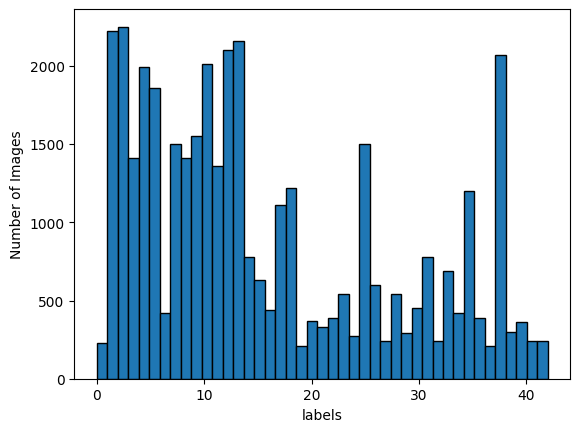

In [8]:
# show a histogram for the labels numpy array
plt.hist(labels, bins=43, ec="black")
plt.xlabel("labels")
plt.ylabel("Number of Images")
plt.show()

In [9]:
# used to split the training data into train and test files
from sklearn.model_selection import train_test_split

# use 20% of files for testing, and 80% for training
# will shuffle the data by default
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [10]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (31615, 30, 30, 3)
y_train shape: (31615,)
x_test shape: (7904, 30, 30, 3)
y_test shape: (7904,)


In [11]:
from keras.utils import to_categorical

# Convert the image arrays to binary matrices (one hot encoding)
  # One hot encoding associates categorical data with a number instead
  # In this case, we are associating the name of the sign with a number from 1-43 (since we have 43 classes)
y_train_enc = to_categorical(y_train, 43)
y_test_enc = to_categorical(y_test, 43)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


model = Sequential([
    # uses a 5x5 matrix to analyze the overlap on the image
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.2),
    # uses a 3x3 matrix to analyze the overlap on the image
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(units=900, activation='relu'),
    Dropout(rate=0.5),
    # use 43 units because there are 43 classes in the German Traffic Signals Dataset
    Dense(units=43, activation='softmax')
])

In [13]:
# use adam optimizer because it is faster than sgd and because we are using a much larger dataset than the mnist digit dataset
# adam optimizer uses more compute resources than sgd, but it yields faster results and works better with large databases
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [14]:
model.fit(
    x_train,
    y_train_enc,
    epochs=20,
    # uses the test data to measure the accuracy of the weights calculated form the train data
    validation_data=(x_test, y_test_enc)
)

Epoch 1/20
988/988 [==============================] - 182s 183ms/step - loss: 1.3713 - accuracy: 0.6445 - val_loss: 0.2804 - val_accuracy: 0.9384
Epoch 2/20
988/988 [==============================] - 165s 167ms/step - loss: 0.4478 - accuracy: 0.8673 - val_loss: 0.1771 - val_accuracy: 0.9534
Epoch 3/20
988/988 [==============================] - 167s 169ms/step - loss: 0.3368 - accuracy: 0.9011 - val_loss: 0.1425 - val_accuracy: 0.9609
Epoch 4/20
988/988 [==============================] - 173s 175ms/step - loss: 0.2909 - accuracy: 0.9159 - val_loss: 0.1043 - val_accuracy: 0.9724
Epoch 5/20
988/988 [==============================] - 164s 166ms/step - loss: 0.2607 - accuracy: 0.9259 - val_loss: 0.0923 - val_accuracy: 0.9753
Epoch 6/20
988/988 [==============================] - 154s 156ms/step - loss: 0.2389 - accuracy: 0.9313 - val_loss: 0.0678 - val_accuracy: 0.9813
Epoch 7/20
988/988 [==============================] - 160s 162ms/step - loss: 0.2024 - accuracy: 0.9405 - val_loss: 0.0771 -

In [15]:
# predict the class for each image in the test set
y_test_prediction = model.predict(x_test)
y_test_prediction = np.argmax(y_test_prediction, axis=1)
y_test_enc = np.argmax(y_test_enc, axis=1)

247/247 [==============================] - 11s 43ms/step


In [16]:
print(y_test_prediction.shape)
print(y_test_enc.shape)

(7904,)
(7904,)


[[ 49   1   0 ...   0   0   0]
 [  1 427   3 ...   0   0   0]
 [  0   2 456 ...   0   0   0]
 ...
 [  0   0   0 ...  64   0   0]
 [  0   0   0 ...   0  55   0]
 [  0   0   0 ...   0   0  50]]


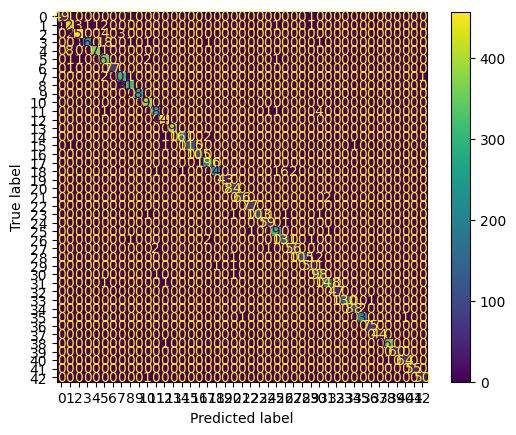

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# create a confusion matrix based on the test data
cm = confusion_matrix(y_test_enc, y_test_prediction)
print(cm)

# display the confusion matrix
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [18]:
from sklearn.metrics import classification_report

# create a classification report based on the test data
print(classification_report(y_test_enc, y_test_prediction))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.97      0.98      0.97       437
           2       0.99      0.98      0.98       465
           3       1.00      0.92      0.96       289
           4       1.00      0.98      0.99       379
           5       0.93      0.99      0.96       368
           6       1.00      0.99      0.99        78
           7       0.98      0.99      0.98       311
           8       0.99      0.99      0.99       315
           9       1.00      1.00      1.00       283
          10       0.99      1.00      0.99       392
          11       0.99      0.98      0.98       294
          12       0.99      1.00      1.00       447
          13       1.00      1.00      1.00       392
          14       0.99      0.98      0.99       164
          15       1.00      0.97      0.99       118
          16       0.99      1.00      1.00       105
          17       0.98    